# 주성분 분석(Principal Component Analysis)

- 비지도학습 알고리즘
- 차원축소 알고리즘(dimensionality reduction algorithm)
- 활용분야는 visualization, noise filtering, feature extraction and engineering

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (23.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155335 files and di

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')
plt.rc('font', family='NanumBarunGothic')
#plt.rcParams['font.family']='Malgun Gothic'
#plt.rcParams['axes.unicode_minus'] = False

In [ ]:
from IPython.display import Image
width=800; height=500
dir_path = r'D:\ASSIST\img\aSSIST_20220111_1학기_조상구'

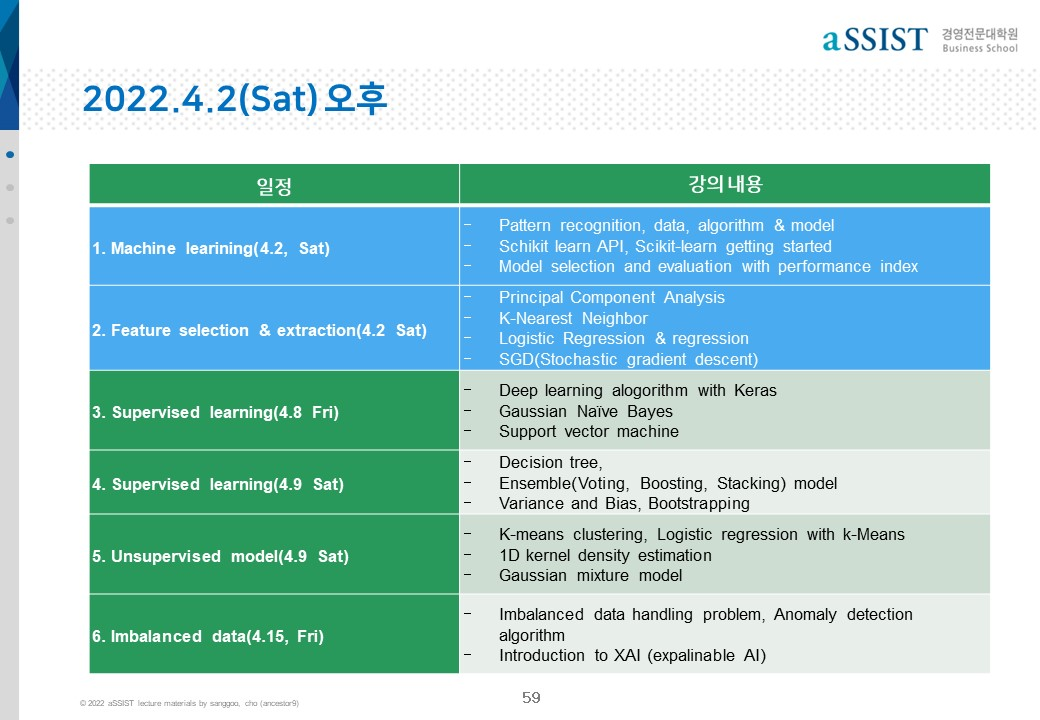

In [ ]:
Image(filename=dir_path + '/슬라이드59.jpg', width=width, height=height)

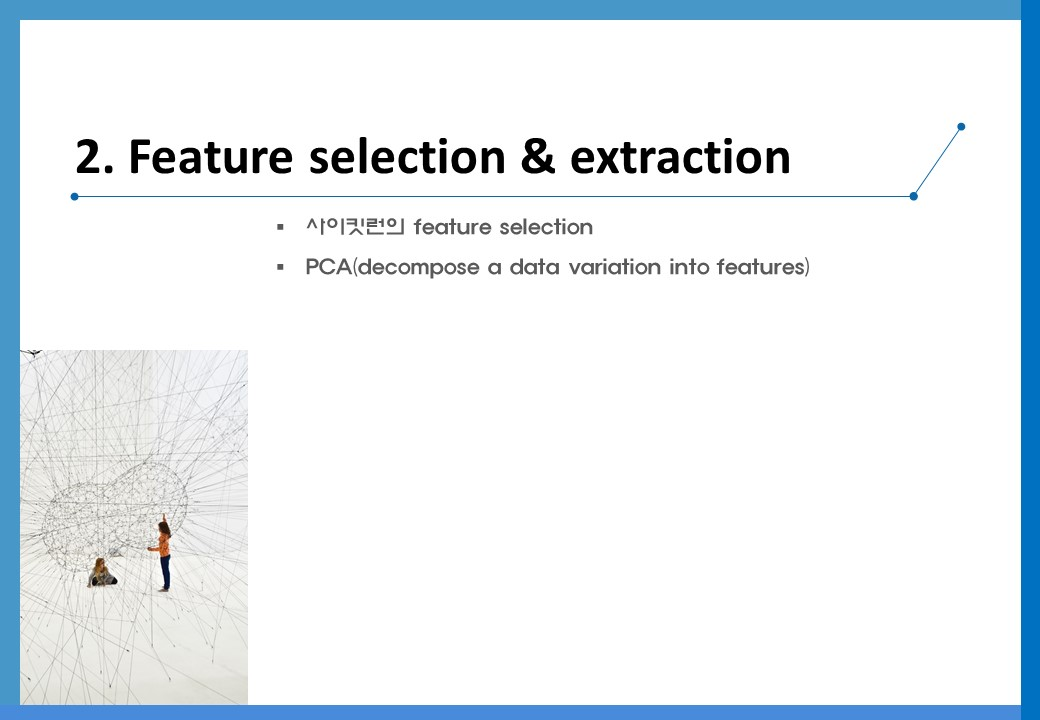

In [ ]:
Image(filename=dir_path + '/슬라이드60.jpg', width=width, height=height)

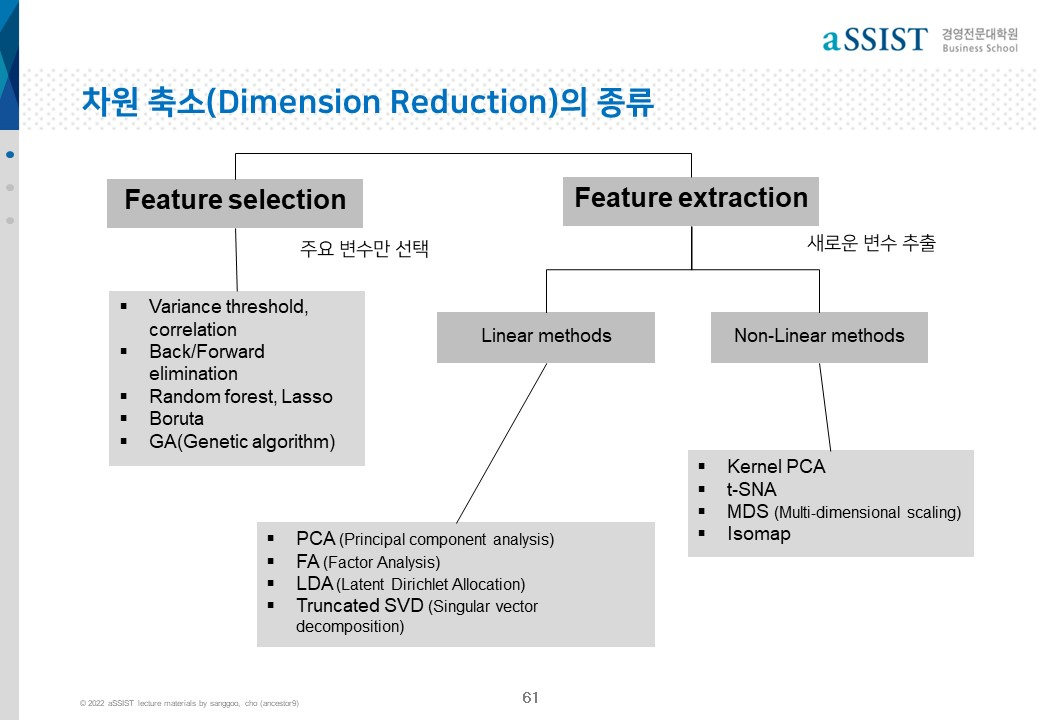

In [ ]:
Image(filename=dir_path + '/슬라이드61.jpg', width=width, height=height)

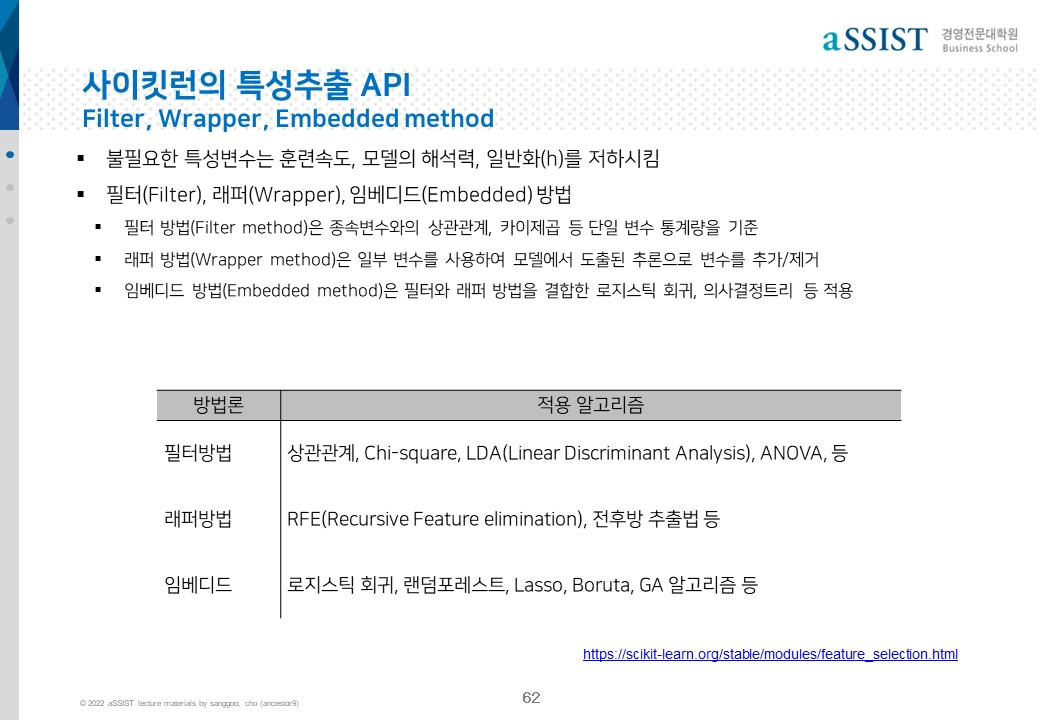

In [ ]:
Image(filename=dir_path + '/슬라이드62.jpg', width=width, height=height)

## Feature selection between ML and DL
<img src='https://quantdare.com/wp-content/uploads/2019/06/deep_learning.png' width=600>

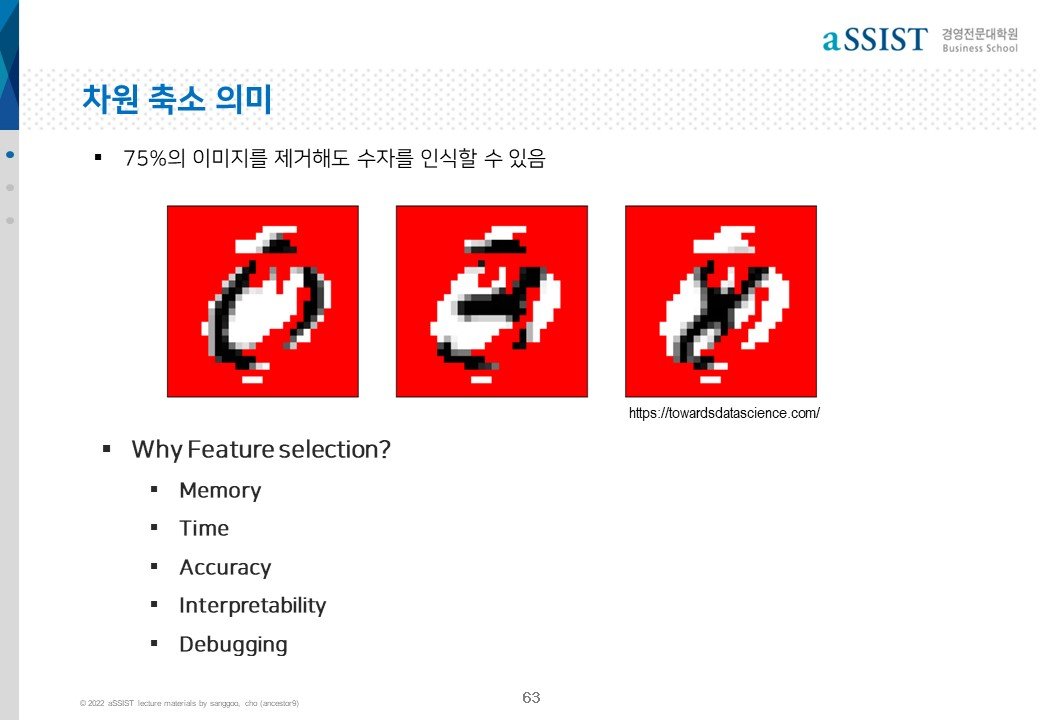

In [ ]:
Image(filename=dir_path + '/슬라이드63.jpg', width=width, height=height)

<a id = "table_of_contents"></a>
## MINST 자료 시각화 

[Trick 100: MNIST 시각화](#trick100)

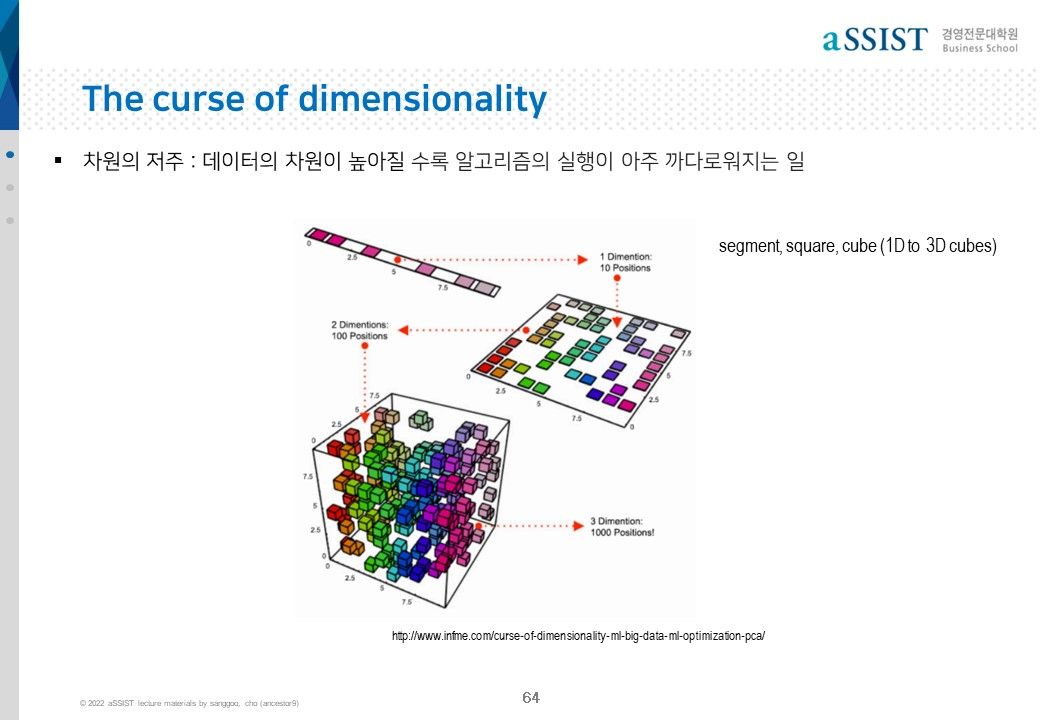

In [ ]:
Image(filename=dir_path + '/슬라이드64.jpg', width=width, height=height)

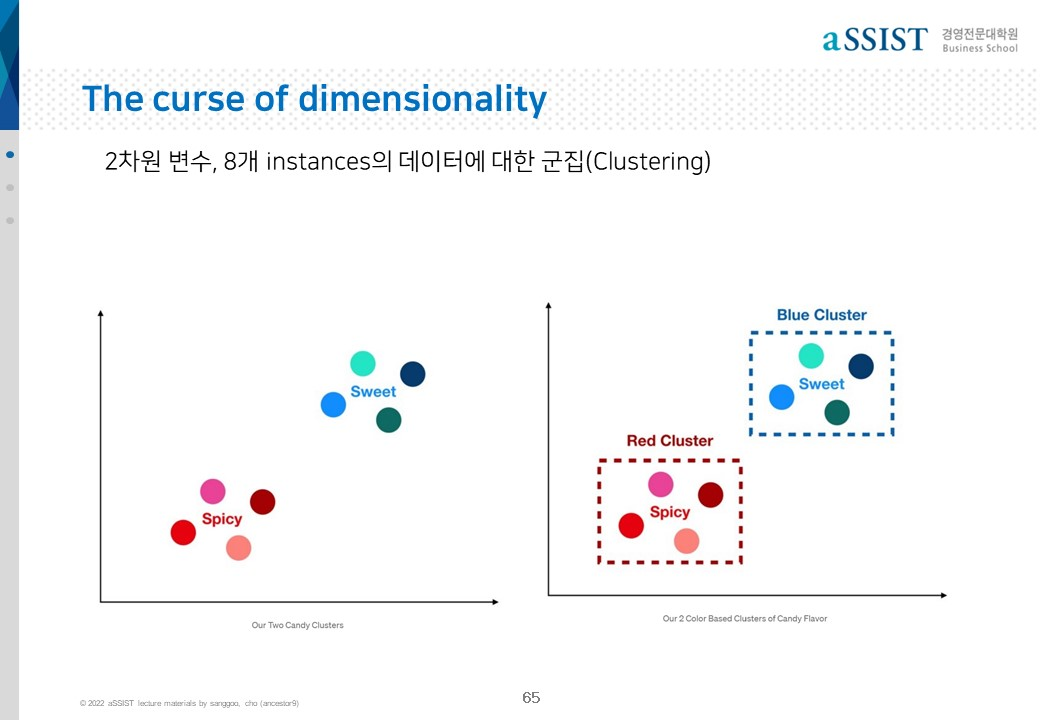

In [ ]:
Image(filename=dir_path + '/슬라이드65.jpg', width=width, height=height)

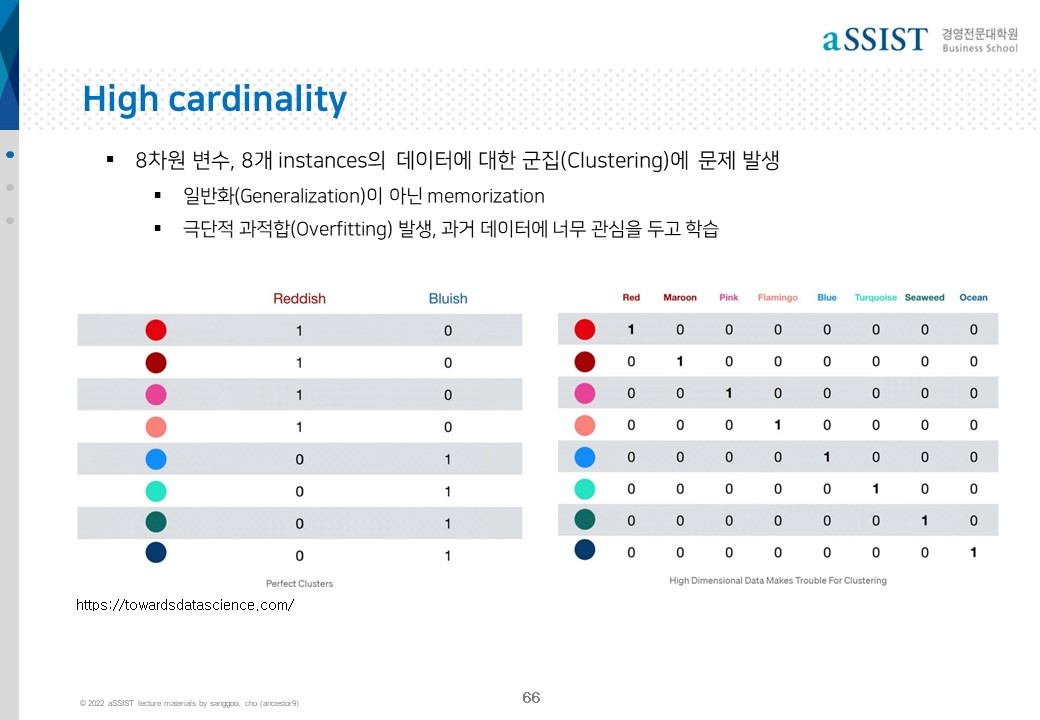

In [ ]:
Image(filename=dir_path + '/슬라이드66.jpg', width=width, height=height)

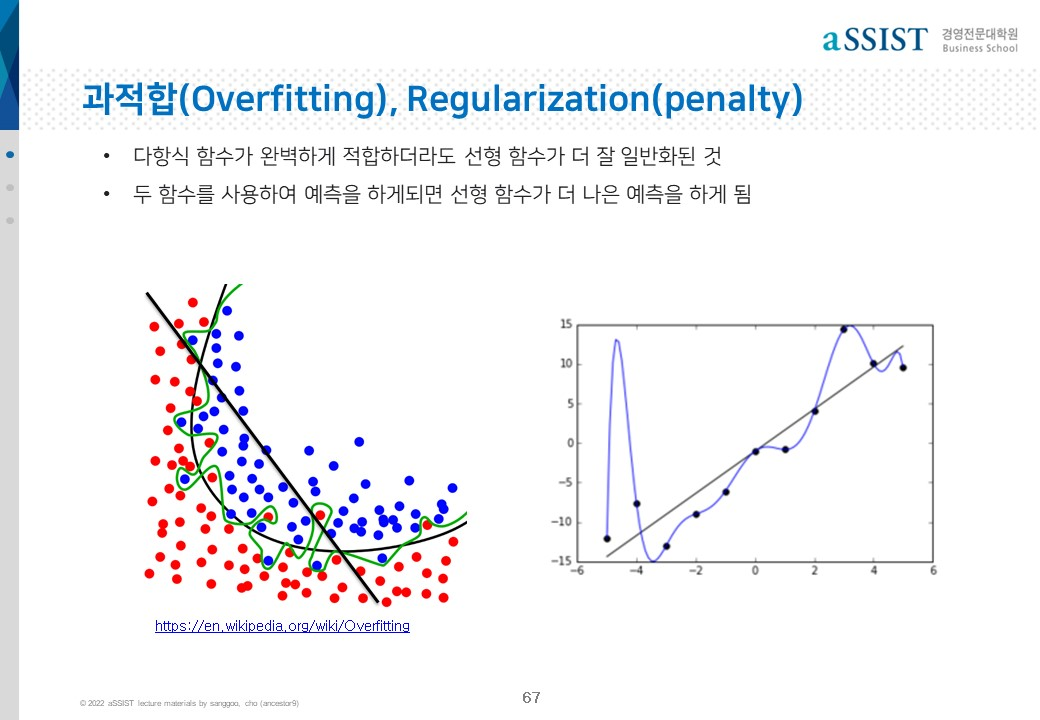

In [ ]:
Image(filename=dir_path + '/슬라이드67.jpg', width=width, height=height)

## 1. 주성분 분석(PCA)과 시각화

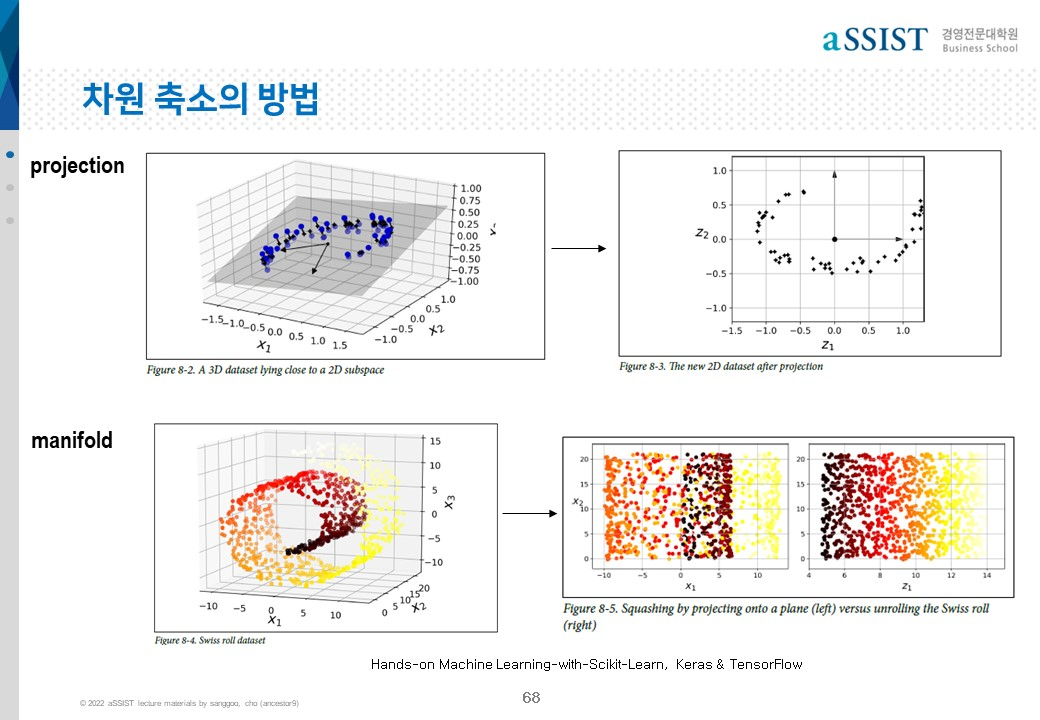

In [ ]:
Image(filename=dir_path + '/슬라이드68.jpg', width=width, height=height)

### 원자료의 공분산을 대부분 설명해 주는 낮은 차원에서 project된 데이터를 변형 
<img src='https://miro.medium.com/max/596/1*QinDfRawRskupf4mU5bYSA.png'>

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


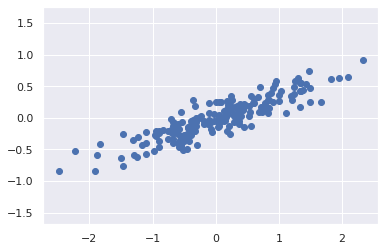

In [ ]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1]);
plt.axis('equal');

Scikit-Learn's ``PCA`` estimator를 사용

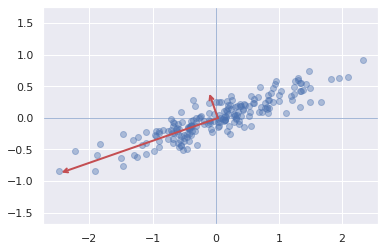

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2, color='r',
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

plt.scatter(X[:, 0], X[:, 1], alpha=0.4)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axvline(0, linewidth=0.5); plt.axhline(0, linewidth=0.5)
plt.axis('equal');

In [ ]:
pca.components_

array([[-0.94446029, -0.32862557],
       [-0.32862557,  0.94446029]])

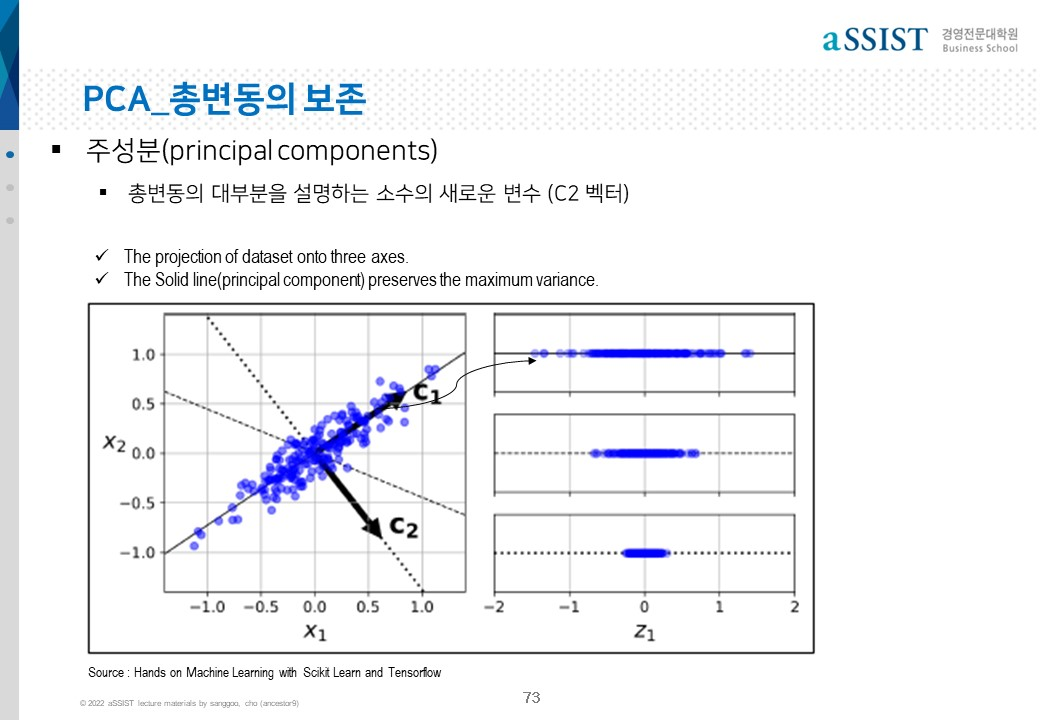

In [ ]:
Image(filename=dir_path + '/슬라이드73.jpg', width=width, height=height)

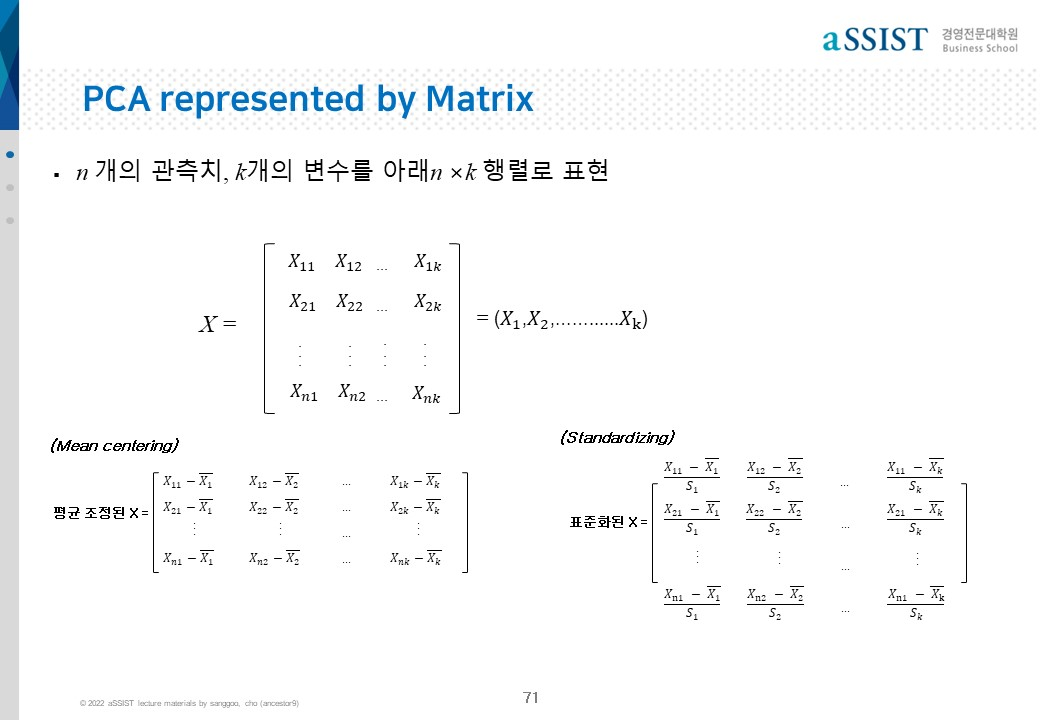

In [ ]:
Image(filename=dir_path + '/슬라이드71.jpg', width=width, height=height)

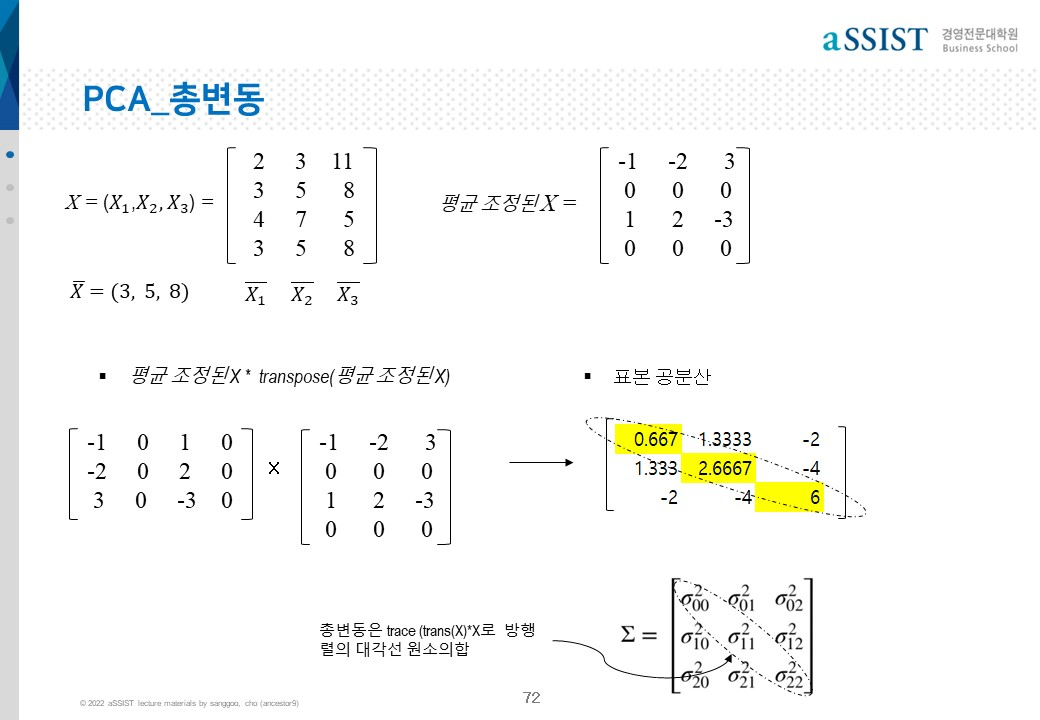

In [ ]:
Image(filename=dir_path + '/슬라이드72.jpg', width=width, height=height)

In [ ]:
X = np.array([[2,3,11], [3,5,8], [4,7,5], [3,5,8]])
X

array([[ 2,  3, 11],
       [ 3,  5,  8],
       [ 4,  7,  5],
       [ 3,  5,  8]])

In [ ]:
X_scaled = X- X.mean(0)
X_scaled

array([[-1., -2.,  3.],
       [ 0.,  0.,  0.],
       [ 1.,  2., -3.],
       [ 0.,  0.,  0.]])

<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/18143cb5b668ff2cc739385a5916d9317bb74df0'>

In [ ]:
np.dot(X_scaled.T, X_scaled)
print('\n')
print(f'원래 데이터의 총변동량(공분산행렬의 trace): {np.trace(np.dot(X_scaled.T, X_scaled))}')

array([[  2.,   4.,  -6.],
       [  4.,   8., -12.],
       [ -6., -12.,  18.]])



원래 데이터의 총변동량(공분산행렬의 trace): 28.0


### 표본공분산은 공분산을 n으로 나누는 것

In [ ]:
np.dot(X_scaled.T, X_scaled)/3

array([[ 0.66666667,  1.33333333, -2.        ],
       [ 1.33333333,  2.66666667, -4.        ],
       [-2.        , -4.        ,  6.        ]])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled) 
print('3개의 주성분구성 자료의 공분산, 3 by 3')
(X_pca.T@X_pca).round(2)

PCA(n_components=2)

3개의 주성분구성 자료의 공분산, 3 by 3


array([[28.,  0.],
       [ 0.,  0.]])

In [ ]:
pca.components_

array([[ 0.26726124,  0.53452248, -0.80178373],
       [ 0.        ,  0.83205029,  0.5547002 ]])

In [ ]:
print(f'주성분 자료의 총변동량: {np.trace(np.dot(X_pca.T, X_pca))}')
print(f'원래 데이터의 총변동량: {np.trace(np.dot(X_scaled.T, X_scaled))}')

주성분 자료의 총변동량: 28.000000000000007
원래 데이터의 총변동량: 28.0


## 2. 주성분분석실시 전에는 반드시 자료표준화(Importance of Feature Scaling_
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py

In [ ]:
from sklearn.datasets import make_classification
X, _ = make_classification(n_samples=500, n_classes=2, weights=[0.8, 0.2],
                              n_features = 20, n_informative = 5, n_redundant = 15,
                              random_state=1)
X.shape

(500, 20)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)

X_scaled = scaler.transform(X) # 평균조정된 X
print(f'평균: {X_scaled.mean(0).round(2)}, 표준편차: {X_scaled.std(0)}')

평균: [-0. -0. -0. -0. -0.  0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0.  0.  0.
  0. -0.], 표준펀차: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
X_scaled.mean(0)
print('\n')
X_scaled.std(0)

array([-9.32587341e-18, -6.31272812e-16, -4.52970994e-17, -1.59872116e-16,
       -1.20903287e-16,  2.15605311e-16, -4.13447054e-16, -5.08482145e-16,
        8.47100168e-17, -3.18321758e-16, -5.06039655e-16, -2.38697950e-17,
       -1.75415238e-17,  4.79616347e-17, -2.79332113e-16,  7.34967642e-17,
        6.88338275e-18,  9.32587341e-16,  1.46771484e-16, -4.26325641e-17])

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

Text(0.5, 0, 'The number of principal components')

Text(0, 0.5, 'The cumulative ratios of total variances')

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


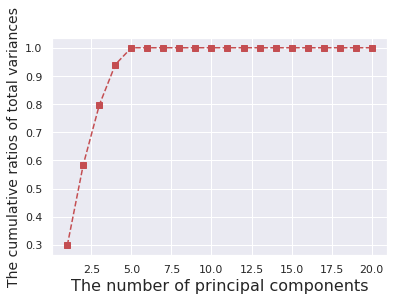

In [ ]:
from sklearn.decomposition import PCA
X_pca = PCA().fit(X_scaled)
plt.plot(np.arange(1, X_scaled.shape[1]+1), np.cumsum(X_pca.explained_variance_ratio_), 'rs--')
plt.xlabel('The number of principal components', fontsize='16')
plt.ylabel('The cumulative ratios of total variances', fontsize='14')

In [ ]:
X_pca.explained_variance_ratio_
print('\n')
np.sum(X_pca.explained_variance_ratio_[:5])

array([2.97832936e-01, 2.87136894e-01, 2.11795369e-01, 1.43686655e-01,
       5.95481460e-02, 1.85588758e-32, 8.98772953e-33, 6.39788430e-33,
       4.31140702e-33, 1.75735911e-33, 1.29609739e-33, 1.08394820e-33,
       1.04649925e-33, 9.91843851e-34, 9.53502576e-34, 8.41291933e-34,
       7.60497699e-34, 6.88390726e-34, 6.11413093e-34, 3.72218475e-34])

1.0

In [ ]:
pca = PCA(n_components=3)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled) 
print('3개의 주성분구성 자료의 공분산, 3 by 3')
(X_pca.T@X_pca).round(2)

PCA(n_components=3)

3개의 주성분구성 자료의 공분산, 3 by 3


array([[2978.33,   -0.  ,    0.  ],
       [  -0.  , 2871.37,   -0.  ],
       [   0.  ,   -0.  , 2117.95]])

In [ ]:
print(f'주성분 자료의 총변동량: {np.trace(np.dot(X_pca.T, X_pca))}')
print(f'원래 데이터의 총변동량: {np.trace(np.dot(X_scaled.T, X_scaled))}')

주성분 자료의 총변동량: 7967.651987498316
원래 데이터의 총변동량: 10000.0


In [ ]:
PCA(n_components=3).fit(X_scaled).transform(X_scaled)
print('\n')
PCA(n_components=3).fit_transform(X_scaled)

array([[-4.63093464,  0.10004578, -3.36360781],
       [ 1.6750281 ,  3.85537405, -0.5130476 ],
       [-2.07846922, -2.73340069,  0.6576643 ],
       ...,
       [ 2.91569809, -0.43933638,  0.97472991],
       [ 3.75498254,  1.05317344, -0.86925199],
       [ 2.38463299,  1.2944352 , -0.19150087]])

array([[-4.63093464,  0.10004578, -3.36360781],
       [ 1.6750281 ,  3.85537405, -0.5130476 ],
       [-2.07846922, -2.73340069,  0.6576643 ],
       ...,
       [ 2.91569809, -0.43933638,  0.97472991],
       [ 3.75498254,  1.05317344, -0.86925199],
       [ 2.38463299,  1.2944352 , -0.19150087]])

In [ ]:
pca.components_

array([[ 3.44904253e-01,  7.07216308e-02, -3.71688613e-01,
        -1.69085951e-01, -1.40551988e-01, -3.51813645e-01,
         1.38943301e-01,  3.26562215e-01, -1.00539550e-01,
         1.37518851e-01,  1.85597014e-01, -1.28822933e-02,
         2.51806628e-02, -3.00174432e-01, -8.35623847e-02,
        -2.36734255e-02,  3.39187760e-01,  4.12935325e-04,
        -4.03537674e-01, -4.04209624e-03],
       [ 4.96396102e-02,  4.06261465e-01, -5.81803353e-02,
        -1.13562075e-01,  3.65312877e-01,  2.12521801e-01,
        -2.61516941e-01, -1.14204170e-01,  1.97303400e-01,
         9.60940309e-02, -1.27726378e-01,  1.39649435e-01,
         1.01636091e-02, -2.14320462e-01, -3.64669954e-01,
        -3.27714821e-01,  5.07631251e-02, -3.56822180e-01,
        -6.04086193e-02, -2.28492732e-01],
       [-1.83936608e-01,  5.43112754e-02, -2.27588895e-02,
        -2.39314767e-01, -3.73136443e-02,  2.29759233e-04,
         9.50578407e-02,  2.19822007e-01,  3.24649119e-01,
        -2.90213211e-01,  1.9

## 3 원자료 복원
- PCA 알고리즘을 사용하여  high dimensionality 데이터를 저차원의 데이터로 빠르고 효율적으로 인식하여 원래데이터로 복원할 수있다.
  * 얼굴인식, 이미지복원 등 분야에서 활용

In [ ]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

PCA(n_components=2)

original shape:    (500, 20)
transformed shape: (500, 2)


##### 20차원의 원자료를 2차원으로 축소한 주성분으로 inverse transform하여 원자료를 복원하여  원자료와 같이 표현

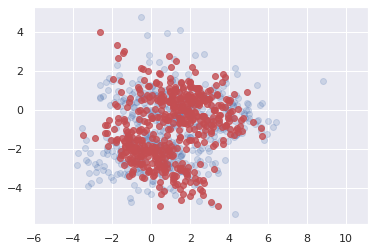

In [ ]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8, color='r')
plt.axis('equal');

- 옅은 색은 원자료이고 붉은 색은 projected version임
- 총변동량은 가장 많이 설명하는 주성분으로 복원하면 거의 원자료와 비슷하게 됨

## 4. 주성분 분석(PCA)
- 주성분 분석을 위한 알고리즘 소개

   * (1) 분광 분해(Spectral decomposition) : 요인분석(factor analysis)
   * (2) 특이치 분해(Singular Value Decomposition) : Scikit-learn API
   * (3) 축소된 특이치 분해(Truncated SVD)
   
 https://angeloyeo.github.io/2019/08/01/SVD.html

In [ ]:
from scipy import misc
sns.reset_defaults() 
img_array = misc.face()
red_array = img_array[:, :, 0] #img_gray = img_array @ [0.2126, 0.7152, 0.0722]
# green_array = img_array[:, :, 1], blue_array = img_array[:, :, 2]
img_array.shape
red_array.shape

(768, 1024, 3)

(768, 1024)

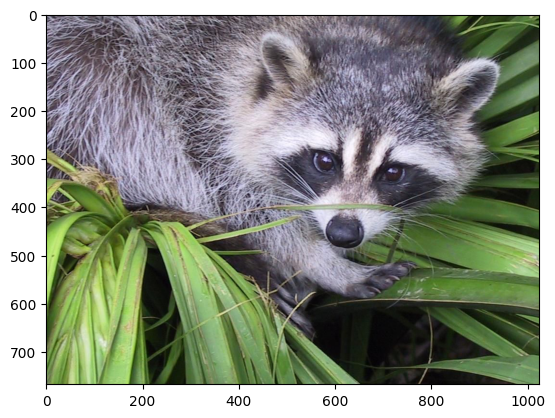

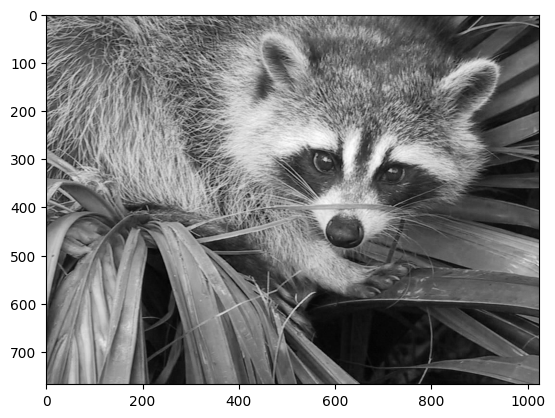

In [ ]:
plt.imshow(img_array, cmap="gray"); plt.show()
plt.imshow(red_array, cmap="gray")

## Eigen vector와 PCA의 기하학적 의미

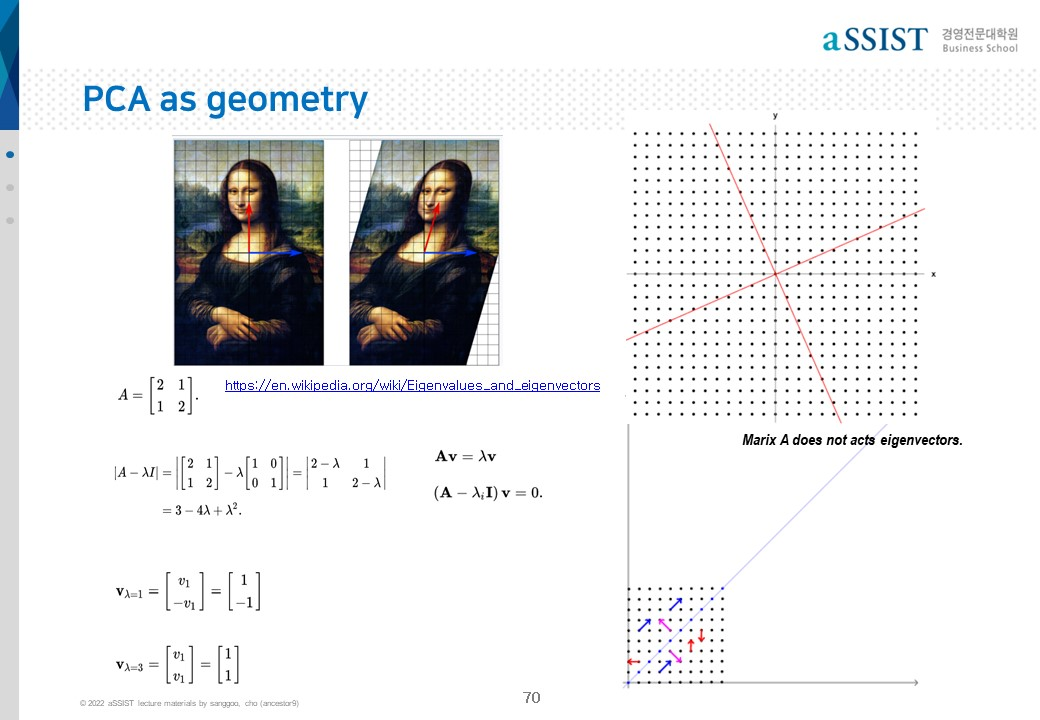

In [ ]:
Image(filename=dir_path + '/슬라이드70.jpg', width=width, height=height)

<img src = 'https://wikimedia.org/api/rest_v1/media/math/render/svg/25d526099011bbd1f25ca18d062053b519c4ca1c'>
<img src = 'https://upload.wikimedia.org/wikipedia/commons/thumb/5/58/Eigenvalue_equation.svg/500px-Eigenvalue_equation.svg.png'>

<img src = 'https://upload.wikimedia.org/wikipedia/commons/thumb/f/f7/Eigenvectors_of_a_linear_operator.gif/400px-Eigenvectors_of_a_linear_operator.gif'>

<img src = 'https://upload.wikimedia.org/wikipedia/commons/0/06/Eigenvectors.gif'>

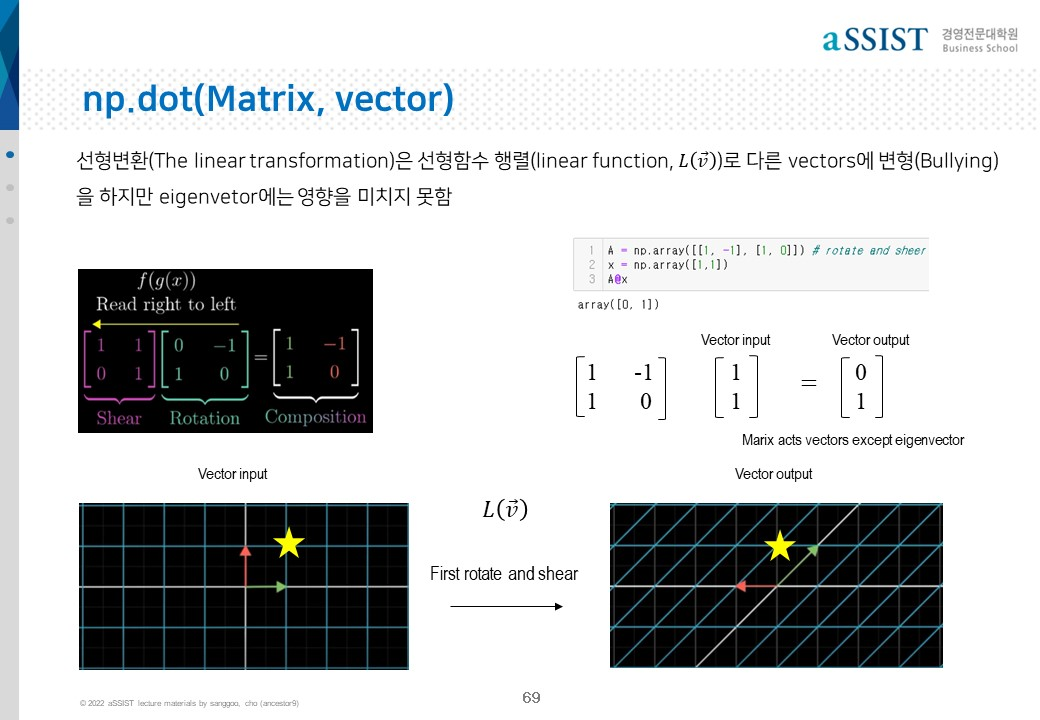

In [ ]:
Image(filename=dir_path + '/슬라이드69.jpg', width=width, height=height)

### 행렬변환(Matrix Transformation)
- 행렬은 벡터를 bully

In [ ]:
cov = 0.
mean = [0, 0]
true_cov = np.array([[1, cov],
                     [cov, 1]])

X = np.random.RandomState(0).multivariate_normal(mean= mean,
                                                 cov= true_cov,
                                                 size= 1000)

Text(0.5, 1.0, 'The scatter graph of x1, x2')

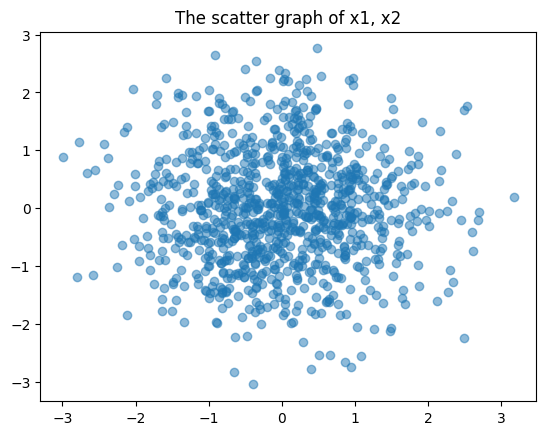

In [ ]:
ax = plt.scatter(X[:,0], X[:,1], alpha=0.5)
plt.title("The scatter graph of x1, x2")

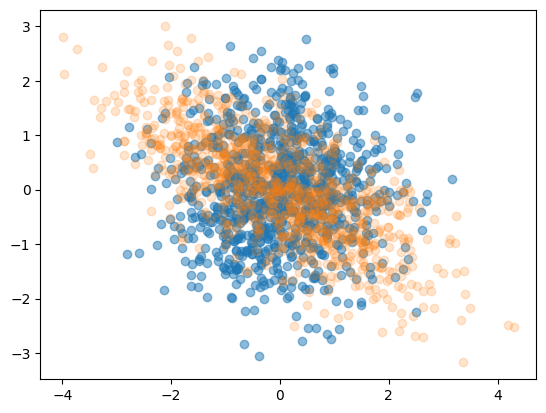

In [ ]:
rotate_sheer = np.array([[1,-1], [1,0]])
ax = plt.scatter(X[:,0], X[:,1], alpha=0.5)
ax = plt.scatter(np.dot(X, rotate_sheer)[:,0], np.dot(X, rotate_sheer)[:,1], alpha=0.2)

In [ ]:
matrix_bully_1 = np.array([[5,2], [2,4]])
matrix_bully_2 = np.array([[3,-2], [5,-4]])
np.dot(X, matrix_bully_1)

array([[ 9.62057615,  5.12873353],
       [ 9.37547632, 10.92104877],
       [ 7.38323419, -0.17399554],
       ...,
       [ 1.18464244,  0.78665955],
       [ 7.32448477,  3.43678222],
       [-8.33144784, -7.52768432]])

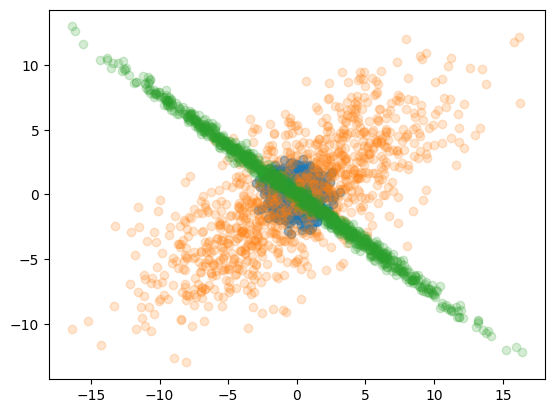

In [ ]:
ax = plt.scatter(X[:,0], X[:,1], alpha=0.5)
ax = plt.scatter(np.dot(X, matrix_bully_1)[:,0], np.dot(X, matrix_bully_1)[:,1], alpha=0.2)
ax = plt.scatter(np.dot(X, matrix_bully_2)[:,0], np.dot(X, matrix_bully_2)[:,1], alpha=0.2)

## 주성분(Principal Componnents)의 선형대수
- 기존 변수들을 선형 조합한 새로운 변수
- 좌표축을 회전하여 새로운 변수 (새로운 좌표) 생성
- 기존 변수들의 총변동과 새로운 변수의 총변동은 동일
- 총변동의 대부분을 설명하는 소수의 새로운 변수를 찾는 것이 목적

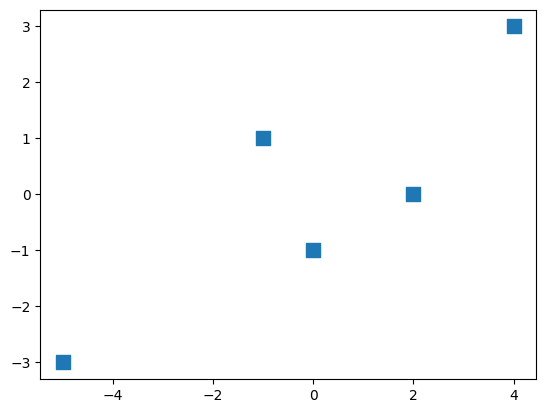

In [ ]:
X = np.array([[4,3], [2,0], [0,-1], [-1,1], [-5,-3]]) # 평균과 분산이 이미 '0'과 '1'
plt.scatter(X[:,0], X[:,1], marker='s', s=100)

In [ ]:
X_scaled = X- X.mean(0)
X_scaled

array([[ 4.,  3.],
       [ 2.,  0.],
       [ 0., -1.],
       [-1.,  1.],
       [-5., -3.]])

In [ ]:
A = np.dot(X_scaled.T, X_scaled)
print(f'원래 데이터의 총변동량(공분산행렬의 trace): {np.trace(A)}')

원래 데이터의 총변동량(공분산행렬의 trace): 66.0


In [ ]:
from ssl import ALERT_DESCRIPTION_HANDSHAKE_FAILURE
from numpy.linalg import eig
eigenvalues, eigenvectors= eig(np.dot(X_scaled.T, X_scaled))

print('E-value:', eigenvalues)
print('E-vector', eigenvectors)

E-value: [62.06888371  3.93111629]
E-vector [[ 0.85065081 -0.52573111]
 [ 0.52573111  0.85065081]]


# Eigenvalues and eigenvectors
- The eigenvalues of matrix A are values of λ that satisfy the equation

<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/17f01da2e017cf67290e4b2052126122c1a27934' width=300>

In [ ]:
np.dot(A, eigenvectors) # Av

array([[52.7989461 , -2.06671014],
       [32.63154326,  3.34400725]])

In [ ]:
lamda = np.eye(2)*eigenvalues # eigen values(scalar를 원소로하는 대각행렬
lamda

array([[62.06888371,  0.        ],
       [ 0.        ,  3.93111629]])

In [ ]:
np.dot(lamda, eigenvectors) # lamda*v

array([[ 52.7989461 , -32.63154326],
       [  2.06671014,   3.34400725]])

## Eigenvetors는 서로 직교한다 (Orthogonal)

In [ ]:
np.dot(eigenvectors, eigenvectors.T).round(2) # 직굑행렬의 dot는 Identity 행렬

array([[1., 0.],
       [0., 1.]])

# 공분산행렬의 eigen vectors를 기저 축으로 이동

### [ 0.85065081 -0.52573111]  - 기저 1축
### [ 0.52573111  0.85065081]  - 기저 2축

In [ ]:
print('E-vector', eigenvectors)

E-vector [[ 0.85065081 -0.52573111]
 [ 0.52573111  0.85065081]]


### 주성분의 기하학적 의미

(-5.0, 5.0)

(-7.0, 7.0)

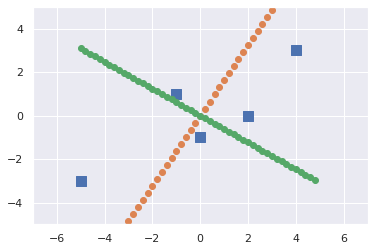

In [ ]:
plt.scatter(X[:,0], X[:,1], marker='s', s=100)
plt.scatter(np.arange(-5,5, 0.2), np.arange(-5,5, 0.2)*0.85065081/0.52573111)
plt.scatter(np.arange(-5,5, 0.2), np.arange(-5,5, 0.2)*0.52573111/-0.85065081)
plt.ylim(-5, 5)
plt.xlim(-7, 7)

### 새로운 축(주성분 축)에서의 좌표값은?

In [ ]:
X_scaled.shape
eigenvectors.shape
print('\n')
np.dot(X_scaled, eigenvectors)

(5, 2)

(2, 2)

array([[ 4.97979657,  0.44902798],
       [ 1.70130162, -1.05146222],
       [-0.52573111, -0.85065081],
       [-0.3249197 ,  1.37638192],
       [-5.83044738,  0.07670314]])

# X1축, X2축을 시계 반대방향으로 θ 만큼 회전
### 새로운 축에서의 좌표 값
- X1* = cosθ × X1 + sinθ × X2 (주성분 1)
- X2* = -sinθ × X1 + cosθ × X2 (주성분 2)
- 새로운 축에서도 총변동 (제곱합)은 66으로 동일함
- θ=31.72º 에서 X1* 이 설명하는 비중이 최대가 됨

(-5.0, 5.0)

(-7.0, 7.0)

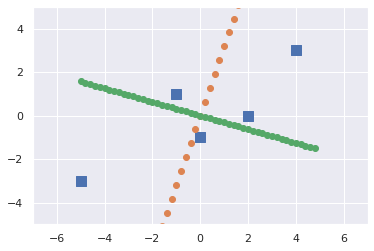

In [ ]:
import math 
plt.scatter(X[:,0], X[:,1], marker='s', s=100)
plt.scatter(np.arange(-5,5, 0.2), np.arange(-5,5, 0.2)*math.cos(31.72)/math.sin(31.72))
plt.scatter(np.arange(-5,5, 0.2), np.arange(-5,5, 0.2)*math.sin(31.72)/-math.cos(31.72))
plt.ylim(-5, 5)
plt.xlim(-7, 7)

<img src='https://docplayer.net/docs-images/49/17208775/images/page_5.jpg' width=800 height=500>

<a id = "trick100"></a>
## 5. PCA for visualization: Hand-written digits

고차원 자료인 수기체 이미지에 PCA 적용
- 8×8 pixel images 자료, 총 64차원
- 2 개의 주성분으로 2차원 평면에서 이미지 기호(0~9) 확인

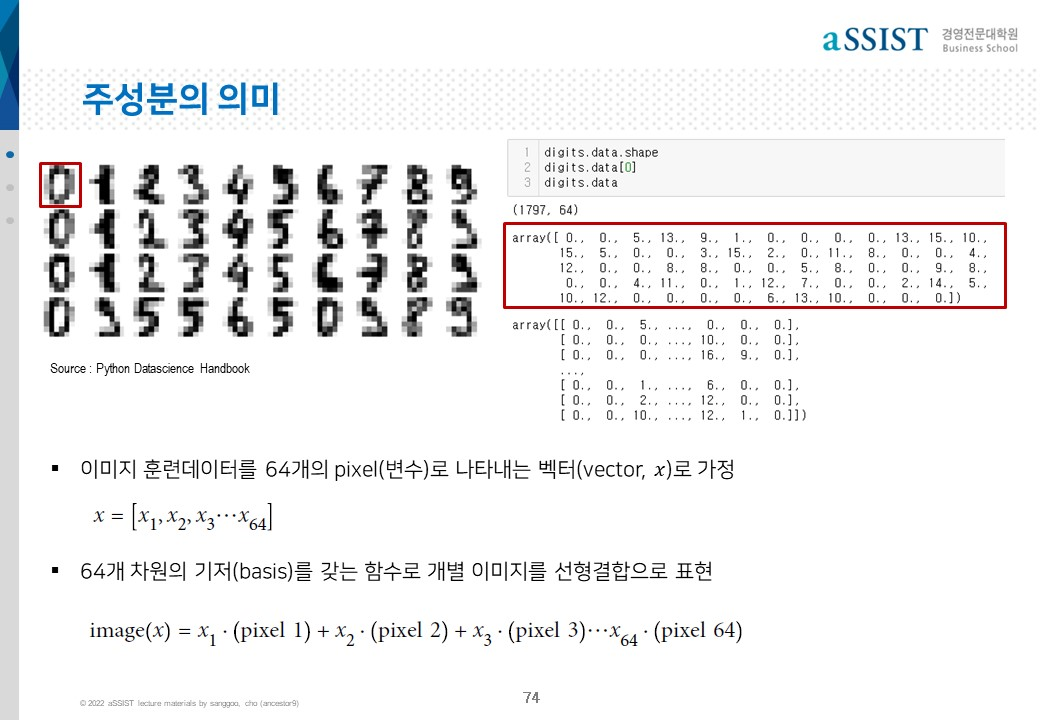

In [ ]:
Image(filename=dir_path + '/슬라이드74.jpg', width=width, height=height)

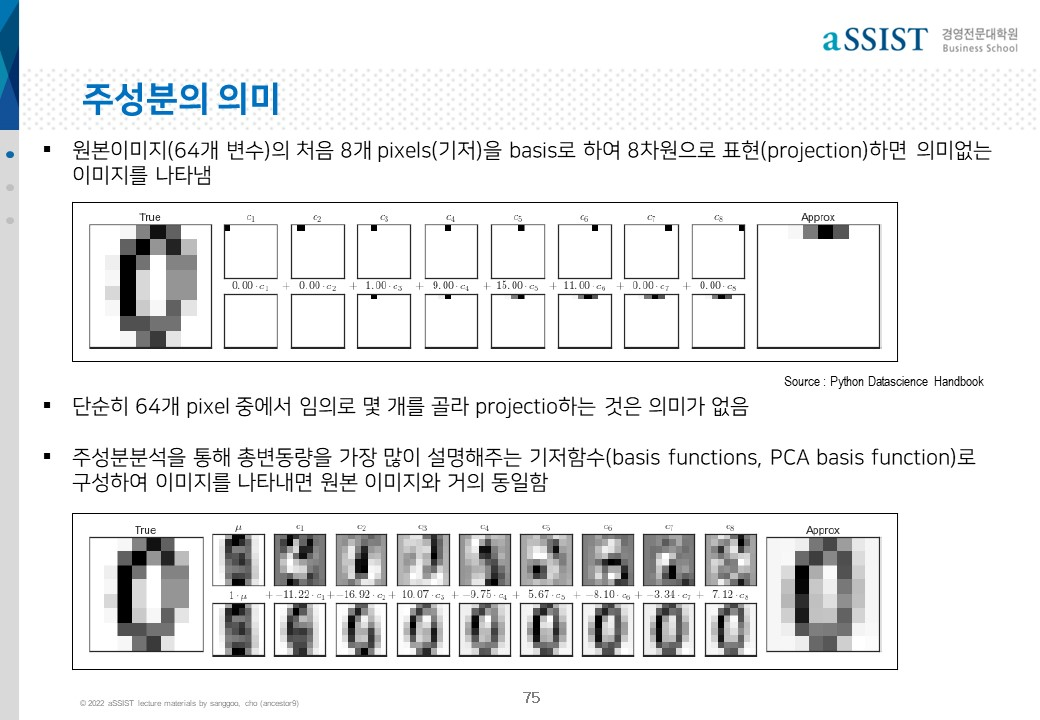

In [ ]:
Image(filename=dir_path + '/슬라이드75.jpg', width=width, height=height)

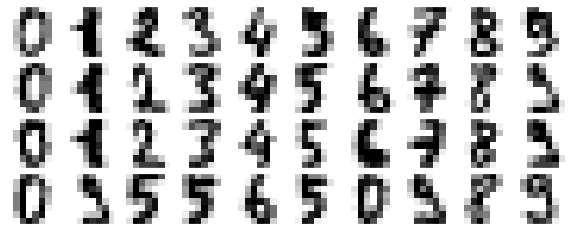

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

64차원 원자료   크기: (1797, 64)
 2차원 축소자료 크기: (1797, 2)


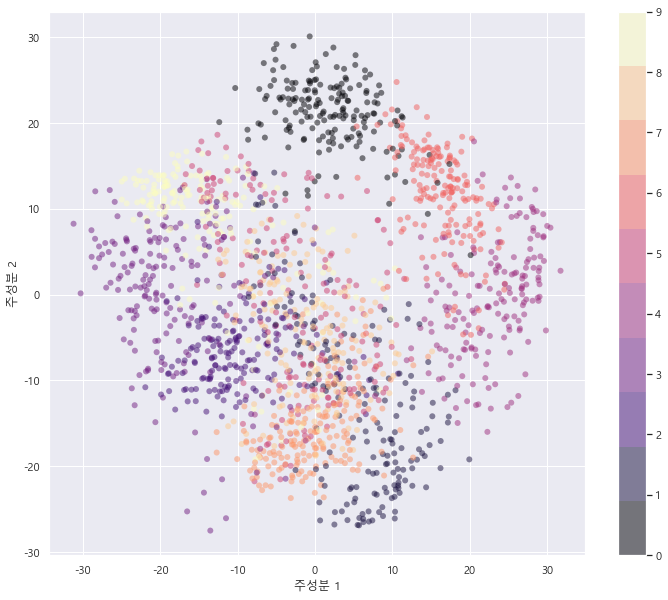

In [ ]:
from sklearn.decomposition import PCA

plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(f'64차원 원자료   크기: {digits.data.shape}')
print(f' 2차원 축소자료 크기: {projected.shape}')

plt.figure(figsize=(12,10))
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('magma', 10))
plt.xlabel('주성분 1'); plt.ylabel('주성분 2')
plt.colorbar();

원래 데이터(64 차원)에서 가장 큰 분산을 갖는 방향을 2개의 주성분에 의한 각 데이터 포인트의 투영입니다.
- 개념적으로 64 차원 공간에서 최적의 확장 및 회전 선형변환을 발견하여 2차원에서 거의 완벽하게 비지도 학습하여 구분에 성공

### 주성분의 의미

64차원의 벡터로 이루어진 원자료를
$$
x = [x_1, x_2, x_3 \cdots x_{64}]
$$

차원이 축소된 주성분으로 총 변동량을 대부분 설명이 가능하다. 64차원의 변수의 선형결합으로 원자료는 아래와 같이 표현

$$
{\rm image}(x) = x_1 \cdot{\rm (pixel~1)} + x_2 \cdot{\rm (pixel~2)} + x_3 \cdot{\rm (pixel~3)} \cdots x_{64} \cdot{\rm (pixel~64)}
$$

원자료의 90%를 표현할 수 있는 주성분(새로운 기저변수)

$$
image(x) = {\rm mean} + x_1 \cdot{\rm (basis~1)} + x_2 \cdot{\rm (basis~2)} + x_3 \cdot{\rm (basis~3)} \cdots
$$

PCA는 최적의 기저변수와 각 기저변수의 계수로 이루어진 함수를 찾는 과정(optimal basis functions)

[Go back to the Table of Contents](#table_of_contents)

# Linearly transform original data into PCA data projected with PCA basis function

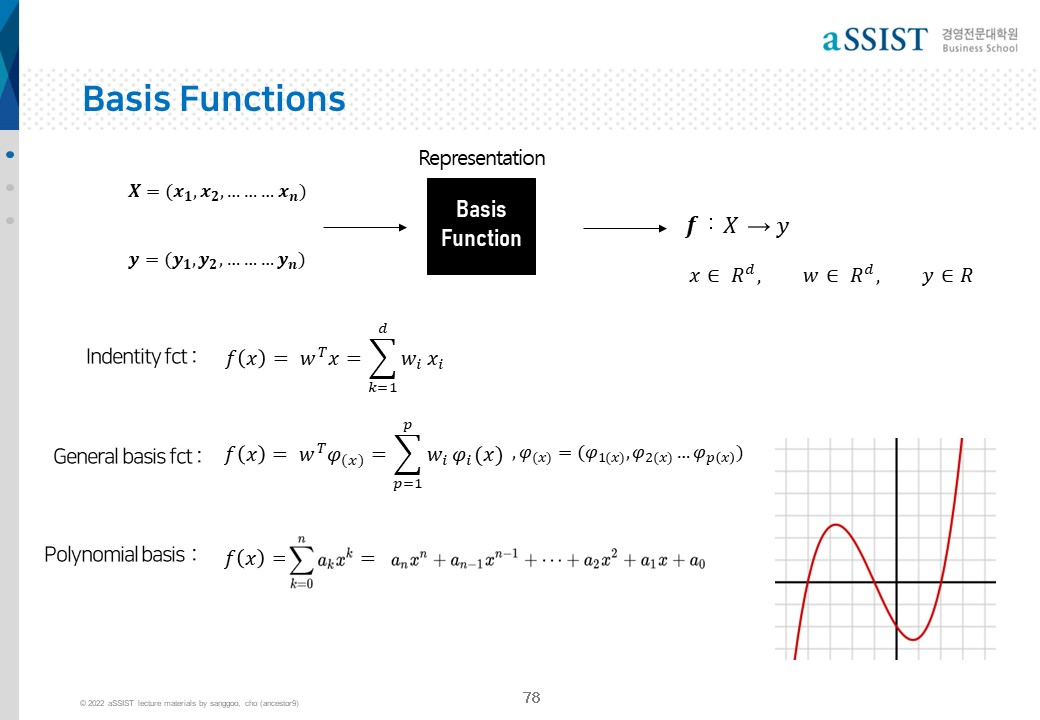

In [ ]:
Image(filename=dir_path + '/슬라이드78.jpg', width=width, height=height)

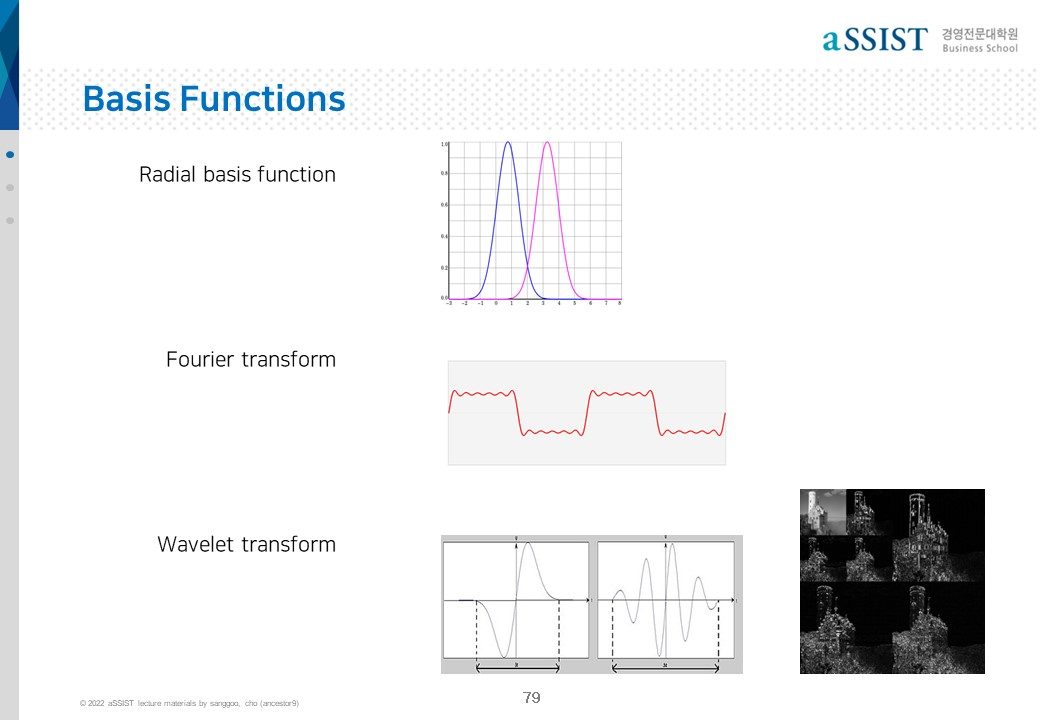

In [ ]:
Image(filename=dir_path + '/슬라이드79.jpg', width=width, height=height)

## 6. PCA as Noise Filtering

- 잡음(noise)의 영향보다 훨씬 큰 분산을 가진 주성분은 상대적으로 잡음의 영향을 받지 않고 주성분을 사용하여 데이터를 재구성하는 경우 우선적으로 신호를 유지하고 노이즈를 제거하게 됨

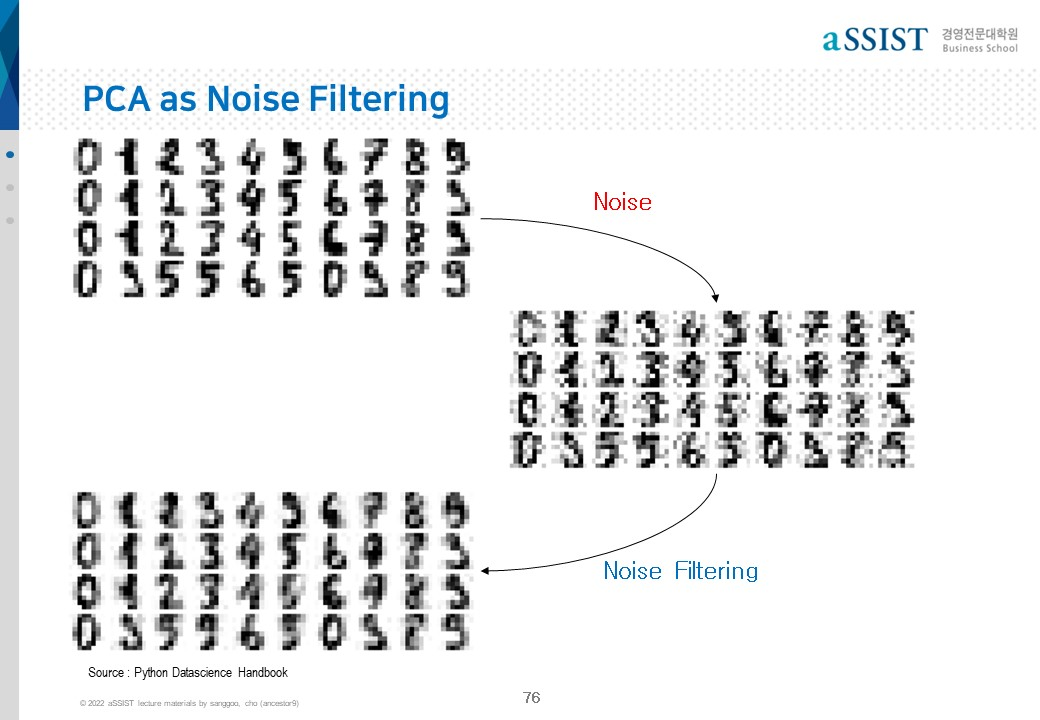

In [ ]:
Image(filename=dir_path + '/슬라이드76.jpg', width=width, height=height)

잡음(noise)를 발생시켜 데이터에 주입

- 잡음이 있는 이미지는 손상되었지만 50% 총변동량을 갖는 주성분 개수 12개를 추출
- 주성분의 inverse of the transform으로 이미지를 filtering하여 데이터를 복원
- 고차원 자료(very high-dimensional data)로 예측하는 대신 원자료의 총변동량을 대부분 설명하는 주성분으로 표현(representation)이 가능

원자료 총변동량의 50%를 설명하는 주성분 개수: 9


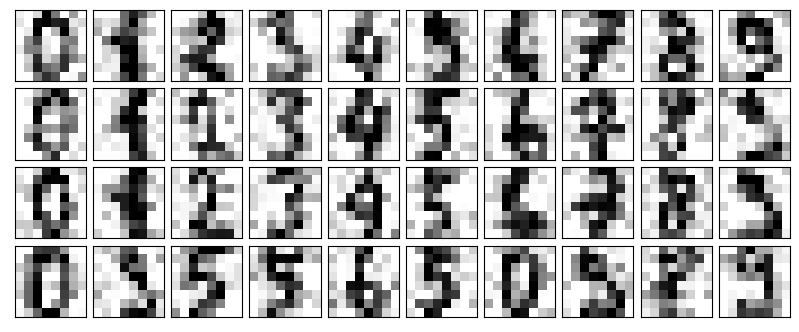

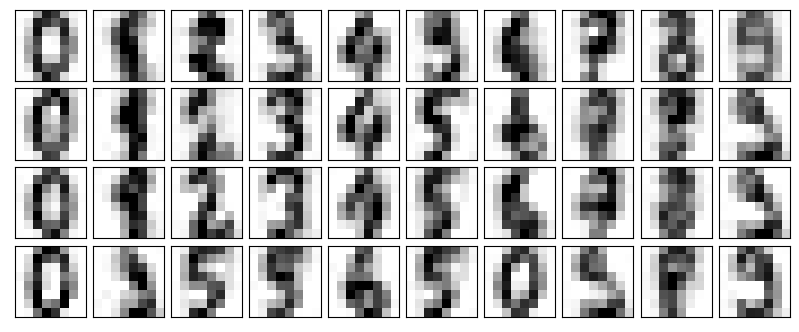

In [ ]:
noisy = np.random.normal(digits.data, 3)
pca = PCA(0.50).fit(noisy)
print(f'원자료 총변동량의 50%를 설명하는 주성분 개수: {pca.n_components_}')
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(noisy); plt.show()
plot_digits(filtered)

## 7.  Eigenfaces 예제 (SVD 사용)
### SVD(singular value decomposition)은 정방형행렬이 아닌 행렬을 3개의 행렬로 인수분해(decomposition)하여 차원을 축소
### 이미지 압축, 복원, 텍스트마이닝의 Topic Model에 응용
https://en.wikipedia.org/wiki/Singular_value_decomposition

<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/3315de0d8549ccefd4c619e4e6cce6ba041dde3c'>
<img src='https://raw.githubusercontent.com/angeloyeo/angeloyeo.github.io/master/pics/2019-08-01_SVD/pic_SVD.png'>

<img src='https://miro.medium.com/max/1400/0*hVJJfuJiS8Wk7jC7'>

# Topic(Genre) --> Words --> Documents
<img src='http://i.imgur.com/r5e5qvs.png'>

<img src='https://www.machinelearningplus.com/wp-content/uploads/2018/12/pyLDAvis-min.png'>

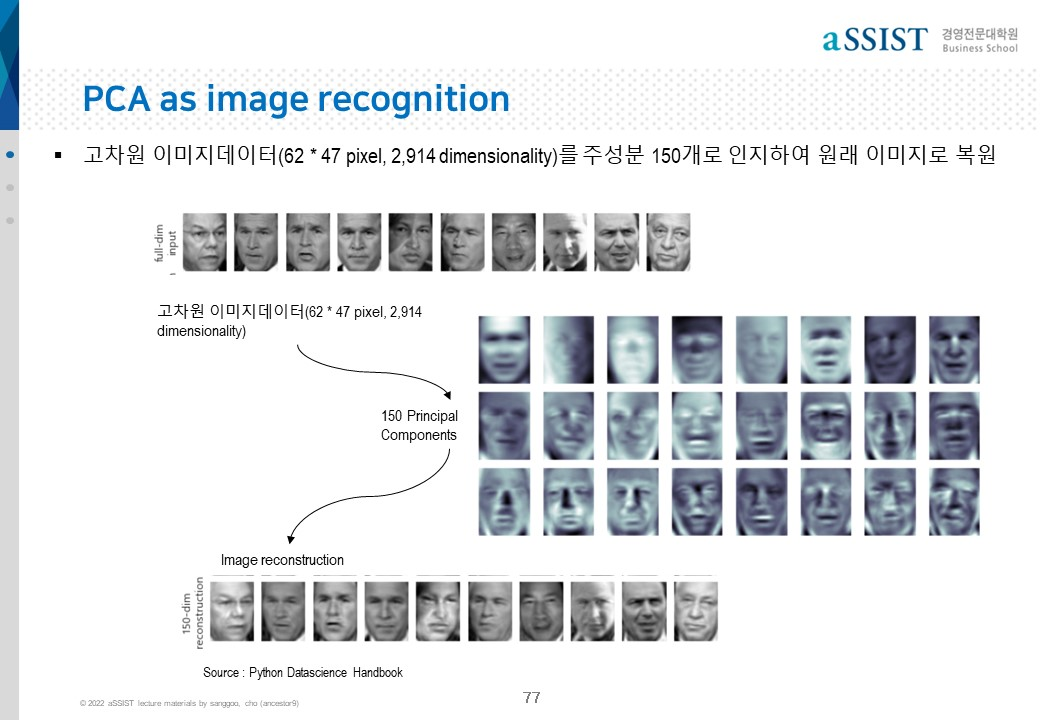

In [ ]:
Image(filename=dir_path + '/슬라이드77.jpg', width=width, height=height)

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

원래 이미지 자료의 차원: (1348, 62, 47)


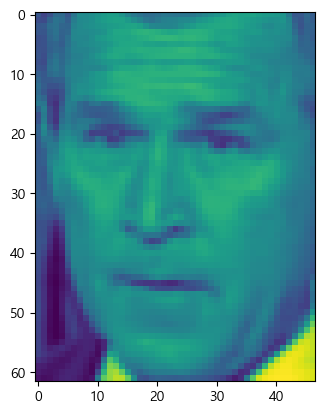

In [ ]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import TruncatedSVD
faces = fetch_lfw_people(min_faces_per_person=60)
faces.keys()
print(f'원래 이미지 자료의 차원: {faces.images.shape}')
plt.imshow(faces.images[1])

### Truncated SVD 로 차원축소

In [ ]:
pca = TruncatedSVD(150)
pca.fit(faces.data)
faces_svd = pca.fit(faces.data).transform(faces.data)
faces_svd.shape

TruncatedSVD(n_components=150)

(1348, 150)

총 150개의 주성분중에서 24개의 주성분(eigenvectors)을 살펴보면, 즉 24개의 "eigenfaces"

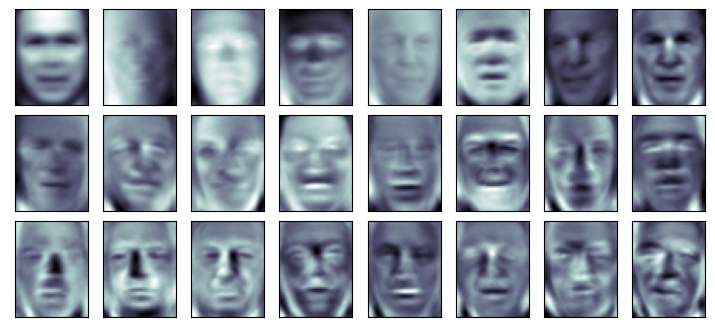

In [ ]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

- 왼쪽 윗편은 주성분얼굴 : 얼굴에 비치는 빛의 각도
- 나머자 주성분얼굴 : 눈, 코, 입술

주성분 개수와 누적 총변동량

Text(0.5, 0, '주성분 개 수')

Text(0, 0.5, '총변동량 누적 설명 비율')

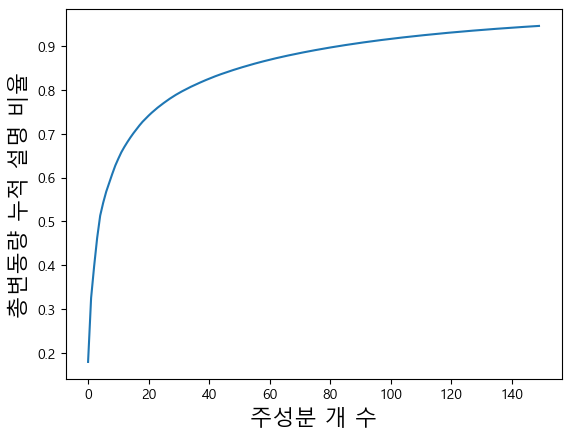

In [ ]:
plt.rcParams['font.family']='Malgun Gothic'
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('주성분 개 수', fontsize='16'); plt.ylabel('총변동량 누적 설명 비율', fontsize='16')

150개의 주성분으로 90%이상의 원자료 변동량을 설명하고 있어 주성분 150개로 원래 이미지를 복원 

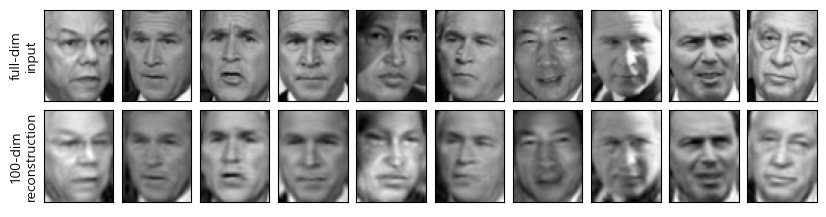

In [ ]:
projected = pca.inverse_transform(faces_svd)

# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('100-dim\nreconstruction');

# Principal Component Analysis Summary
- In this section we have discussed the use of principal component analysis for ,<b>dimensionality
reduction, for visualization of high-dimensional data, for noise filtering, and
for feature selection within high-dimensional data</b>. 
- Given any high-dimensional dataset, I tend to start with PCA in
order to visualize the relationship between points (as we did with the digits), to <b>understand the main variance in the data (as we did with the eigenfaces), and to understand the intrinsic dimensionality (by plotting the explained variance ratio)</b>.
- Certainly PCA is not useful for every high-dimensional dataset, but it offers a straightforward and efficient path to gaining insight into high-dimensional data. PCA’s main weakness is that it tends to <b>be highly affected by outliers</b> in the data. For this reason, many robust variants of PCA have been developed, many of which act to iteratively discard data points that are poorly described by the initial components.

# Kernel Principal Component Analysis (kPCA)
## Projecting data: PCA vs. KernelPCA
### 원자료(original space에서 비선형자료형태일 경우)

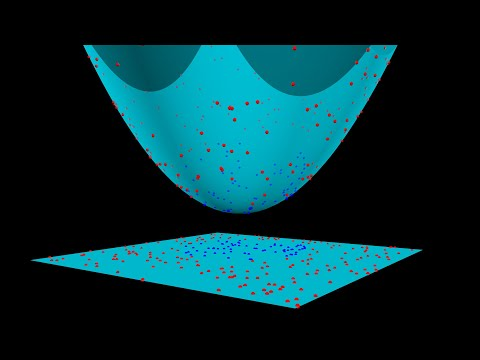

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('3liCbRZPrZA', height='600', width='1000')

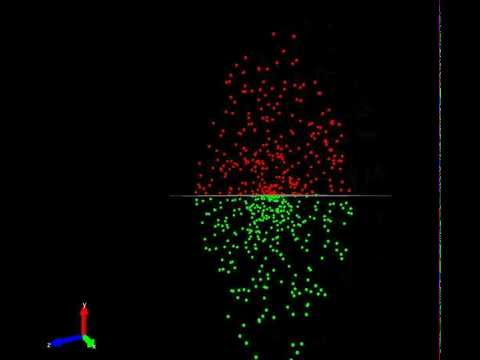

In [ ]:
YouTubeVideo('ndNE8he7Nnk', height='600', width='1000')

In [ ]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=1000, noise=0.02, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

Text(0, 0.5, 'Feature #1')

Text(0.5, 0, 'Feature #0')

Text(0.5, 1.0, 'Training data')

Text(0.5, 0, 'Feature #0')

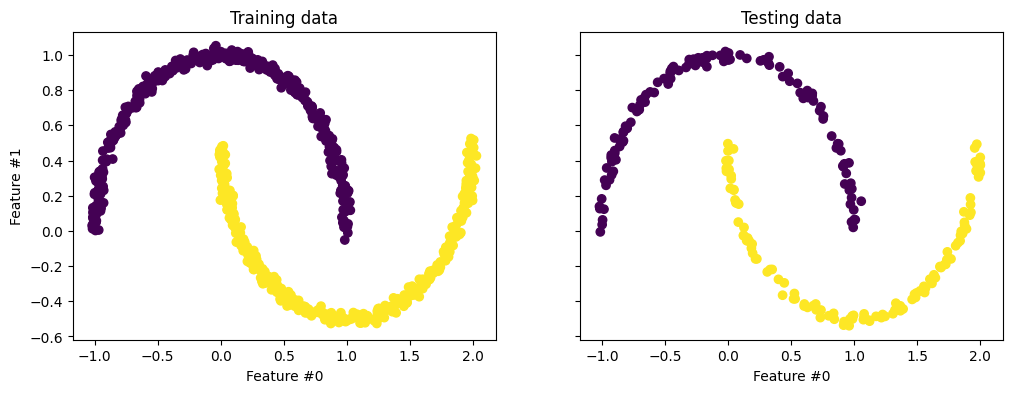

In [ ]:
sns.reset_defaults()

_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(12, 4))

train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Training data")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
test_ax.set_xlabel("Feature #0")
_ = test_ax.set_title("Testing data")

In [ ]:
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components=2)
kernel_pca = KernelPCA(n_components=None, kernel="rbf", gamma=15, fit_inverse_transform=True, alpha=0.1)

X_test_pca = pca.fit(X_train).transform(X_test)
X_test_kernel_pca = kernel_pca.fit(X_train).transform(X_test)

Text(0, 0.5, 'Feature #1')

Text(0.5, 0, 'Feature #0')

Text(0.5, 1.0, 'Testing data')

Text(0, 0.5, 'Principal component #1')

Text(0.5, 0, 'Principal component #0')

Text(0.5, 1.0, 'Projection of testing data\n using PCA')

Text(0, 0.5, 'Principal component #1')

Text(0.5, 0, 'Principal component #0')

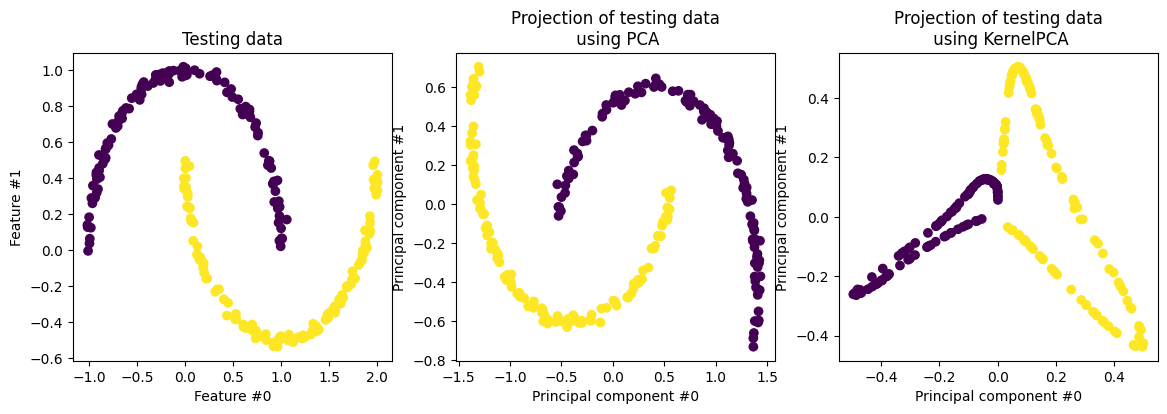

In [ ]:
fig, (orig_data_ax, pca_proj_ax, kernel_pca_proj_ax) = plt.subplots(
    ncols=3, figsize=(14, 4)
)

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Testing data")

pca_proj_ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test)
pca_proj_ax.set_ylabel("Principal component #1")
pca_proj_ax.set_xlabel("Principal component #0")
pca_proj_ax.set_title("Projection of testing data\n using PCA")

kernel_pca_proj_ax.scatter(X_test_kernel_pca[:, 0], X_test_kernel_pca[:, 1], c=y_test)
kernel_pca_proj_ax.set_ylabel("Principal component #1")
kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = kernel_pca_proj_ax.set_title("Projection of testing data\n using KernelPCA")

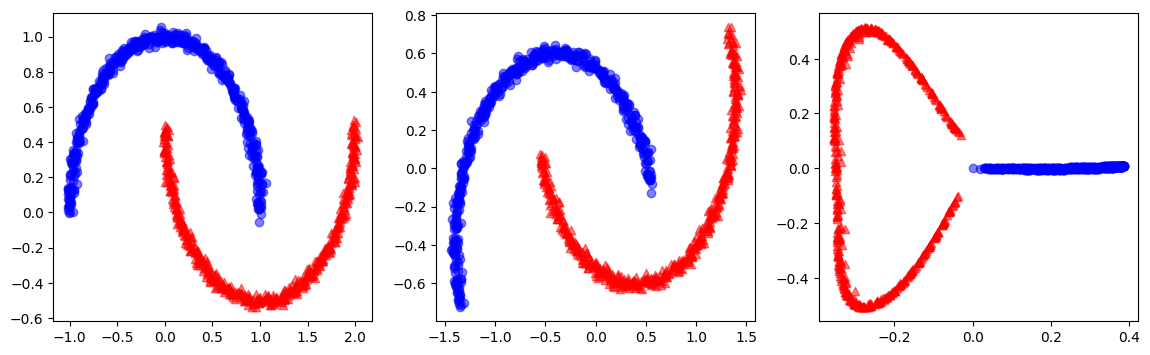

In [ ]:
X_pca = pca.fit_transform(X)
X_kernel_pca = kernel_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14,4))
ax[0].scatter(X[y ==1, 0], X[y ==1, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X[y ==0, 0], X[y ==0, 1], color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_pca[y ==1, 0], X_pca[y ==1, 1], color='red', marker='^', alpha=0.5)
ax[1].scatter(X_pca[y ==0, 0], X_pca[y ==0, 1], color='blue', marker='o', alpha=0.5)

ax[2].scatter(X_kernel_pca[y ==1, 0], X_kernel_pca[y ==1, 1], color='red', marker='^', alpha=0.5)
ax[2].scatter(X_kernel_pca[y ==0, 0], X_kernel_pca[y ==0, 1], color='blue', marker='o', alpha=0.5)

### 원자료를 unfold하는 것이 목적이라면 PCA와 Kernel PCA로 원자료를 변형하여 비교

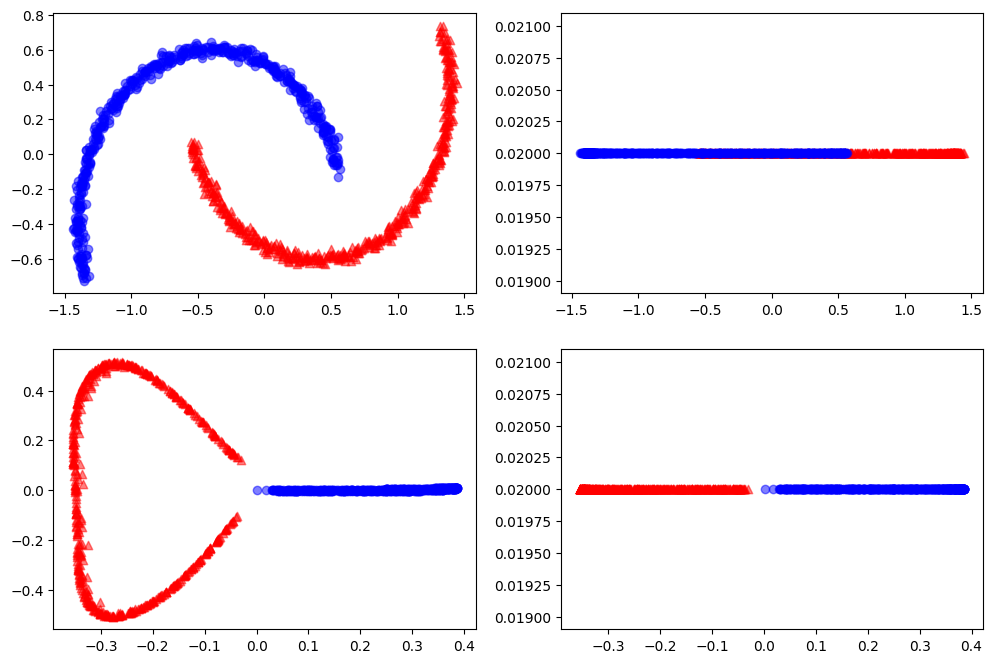

In [ ]:
X_pca = pca.fit_transform(X)
X_kernel_pca = kernel_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

ax[0][0].scatter(X_pca[y ==1, 0], X_pca[y ==1, 1], color='red', marker='^', alpha=0.5)
ax[0][0].scatter(X_pca[y ==0, 0], X_pca[y ==0, 1], color='blue', marker='o', alpha=0.5)
ax[0][1].scatter(X_pca[y ==1, 0], np.zeros((500,1)) + 0.02, color='red', marker='^', alpha=0.5)
ax[0][1].scatter(X_pca[y ==0, 0], np.zeros((500,1)) + 0.02, color='blue', marker='o', alpha=0.5)


ax[1][0].scatter(X_kernel_pca[y ==1, 0], X_kernel_pca[y ==1, 1], color='red', marker='^', alpha=0.5)
ax[1][0].scatter(X_kernel_pca[y ==0, 0], X_kernel_pca[y ==0, 1], color='blue', marker='o', alpha=0.5)
ax[1][1].scatter(X_kernel_pca[y ==1, 0], np.zeros((500,1)) + 0.02, color='red', marker='^', alpha=0.5)
ax[1][1].scatter(X_kernel_pca[y ==0, 0], np.zeros((500,1)) + 0.02, color='blue', marker='o', alpha=0.5)

### 11 Different Uses of Dimensionality Reduction
- https://towardsdatascience.com/11-different-uses-of-dimensionality-reduction-4325d62b4fa6

### Dimensionality Reduction — PCA, ICA and Manifold learning
- https://techairesearch.com/dimensionality-reduction-pca-ica-and-manifold-learning/

# END